In [1]:
#import modules
import sklearn as sk
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#Ignore warning (version warning)

C:\Users\karlo\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\karlo\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\karlo\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\karlo\anaconda3\envs\mle_tf\lib\site-packages\tensorflow\pyth

# REGRESSION

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
# clean data
d = preprocessing.normalize(data)
df = pd.DataFrame(d, columns=data.columns)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.193478          0.018302     0.000000        0.049677   0.001987   
1       0.106989          0.012071     0.000000        0.035663   0.001344   
2       0.134949          0.013149     0.000692        0.039793   0.001592   
3       0.173611          0.004340     0.008681        0.029452   0.001163   
4       0.193478          0.018302     0.000000        0.049677   0.001987   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.287602              0.888952  0.026088  0.091771   0.014642   
1             0.342913              0.919006  0.013673  0.043893   0.009327   
2             0.259517              0.934261  0.017249  0.056402   0.011246   
3             0.263517              0.930059  0.015470  0.048983   0.008991   
4             0.287602              0.888952  0.026088  0.091771   0.014642   

    alcohol   quality  
0  0.245769  0.130728  
1  0.134422  0.068583  
2  0.169551  0.086506  
3  0.151910  0.093006  
4  0.245769  0.130728

In [4]:
# logistic regression

In [5]:
 #Seperate dependant and independant variable
x=df.drop(['quality'],axis=1).values
y=df['quality'].values

In [6]:
#Split dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
#Train model
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [8]:
LinearRegression()

LinearRegression()

In [9]:
y_pred=ml.predict(x_test)

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(LinearRegression(),x,y,cv=5)

array([0.93970169, 0.916911  , 0.93230352, 0.94358895, 0.90730502])

In [12]:
#Evaluate
ml.predict([[0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769]])
#Actual result 0.130728

array([0.1262404])

In [13]:
#R2 score
r2_score(y_test,y_pred)

0.9346980421341259

In [14]:
#MSE score
mse = np.square(np.subtract(y_test,y_pred)).mean()
print(mse)

0.00042002607990484163


Text(0, 0.5, 'Predicted')

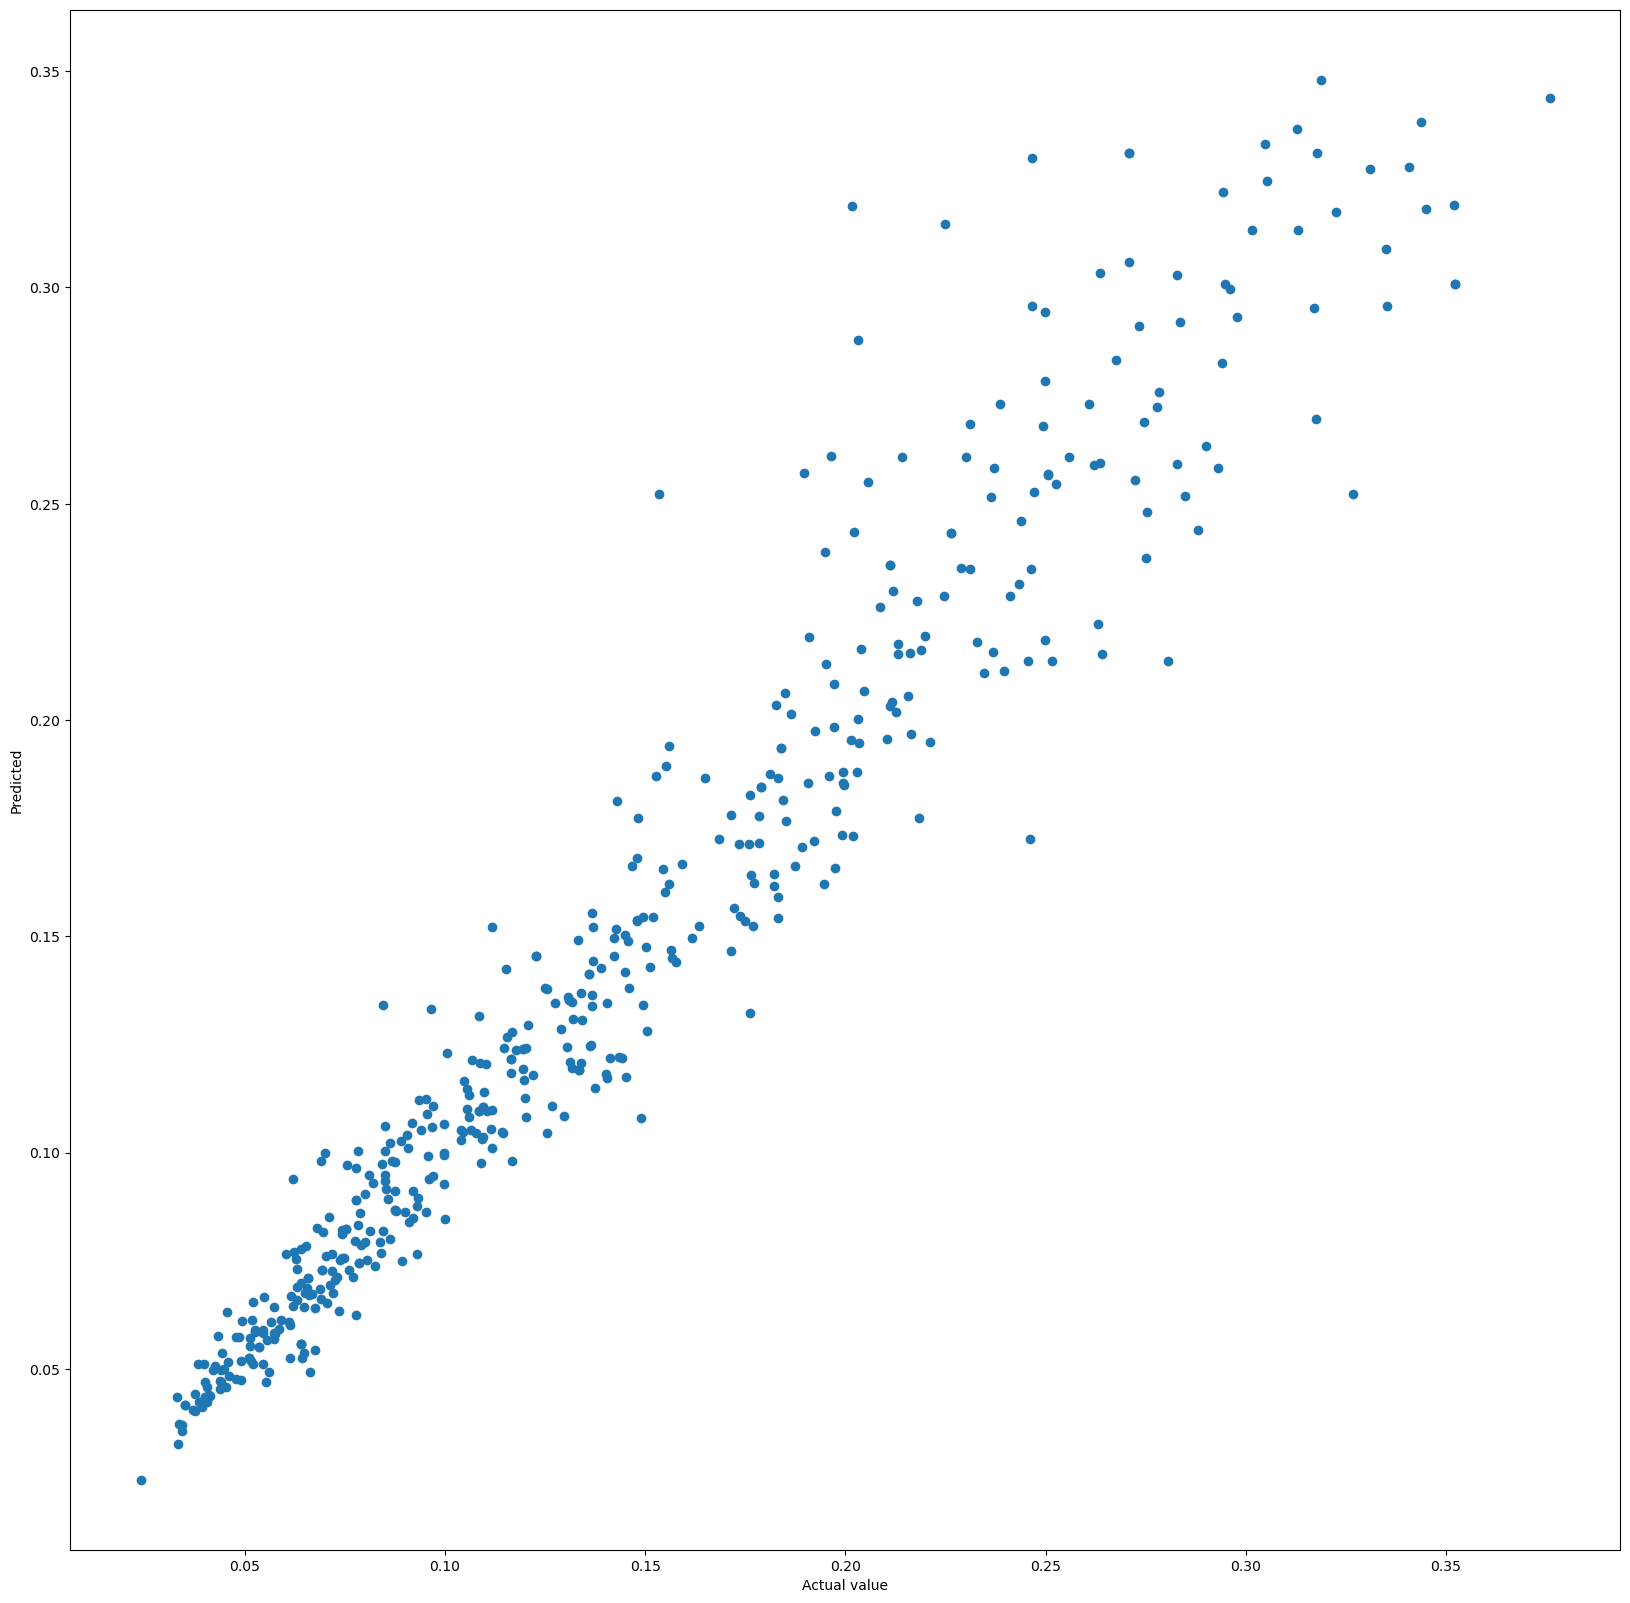

In [15]:
#Plot results
plt.figure(figsize=(20, 20))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted")

In [16]:
# support vector machines

In [17]:
# decision trees and multi-layer

In [18]:
#----------------------------------------------------------------------------------------------------------

In [19]:
# perceptron neural network.


In [20]:
mlp = MLPRegressor(max_iter=10000, activation='relu')
mlp

MLPRegressor(max_iter=10000)

In [21]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
mlp.fit(x_train2,y_train2)

MLPRegressor(max_iter=10000)

In [23]:
y_pred2 = mlp.predict(x_test2)

In [24]:
mse = np.square(np.subtract(y_test2,y_pred2)).mean()
print(mse)

0.0008181831972262386


In [25]:
#R2 score
r2_score(y_test2,y_pred2)

0.8727960780817741

Text(0, 0.5, 'Predicted')

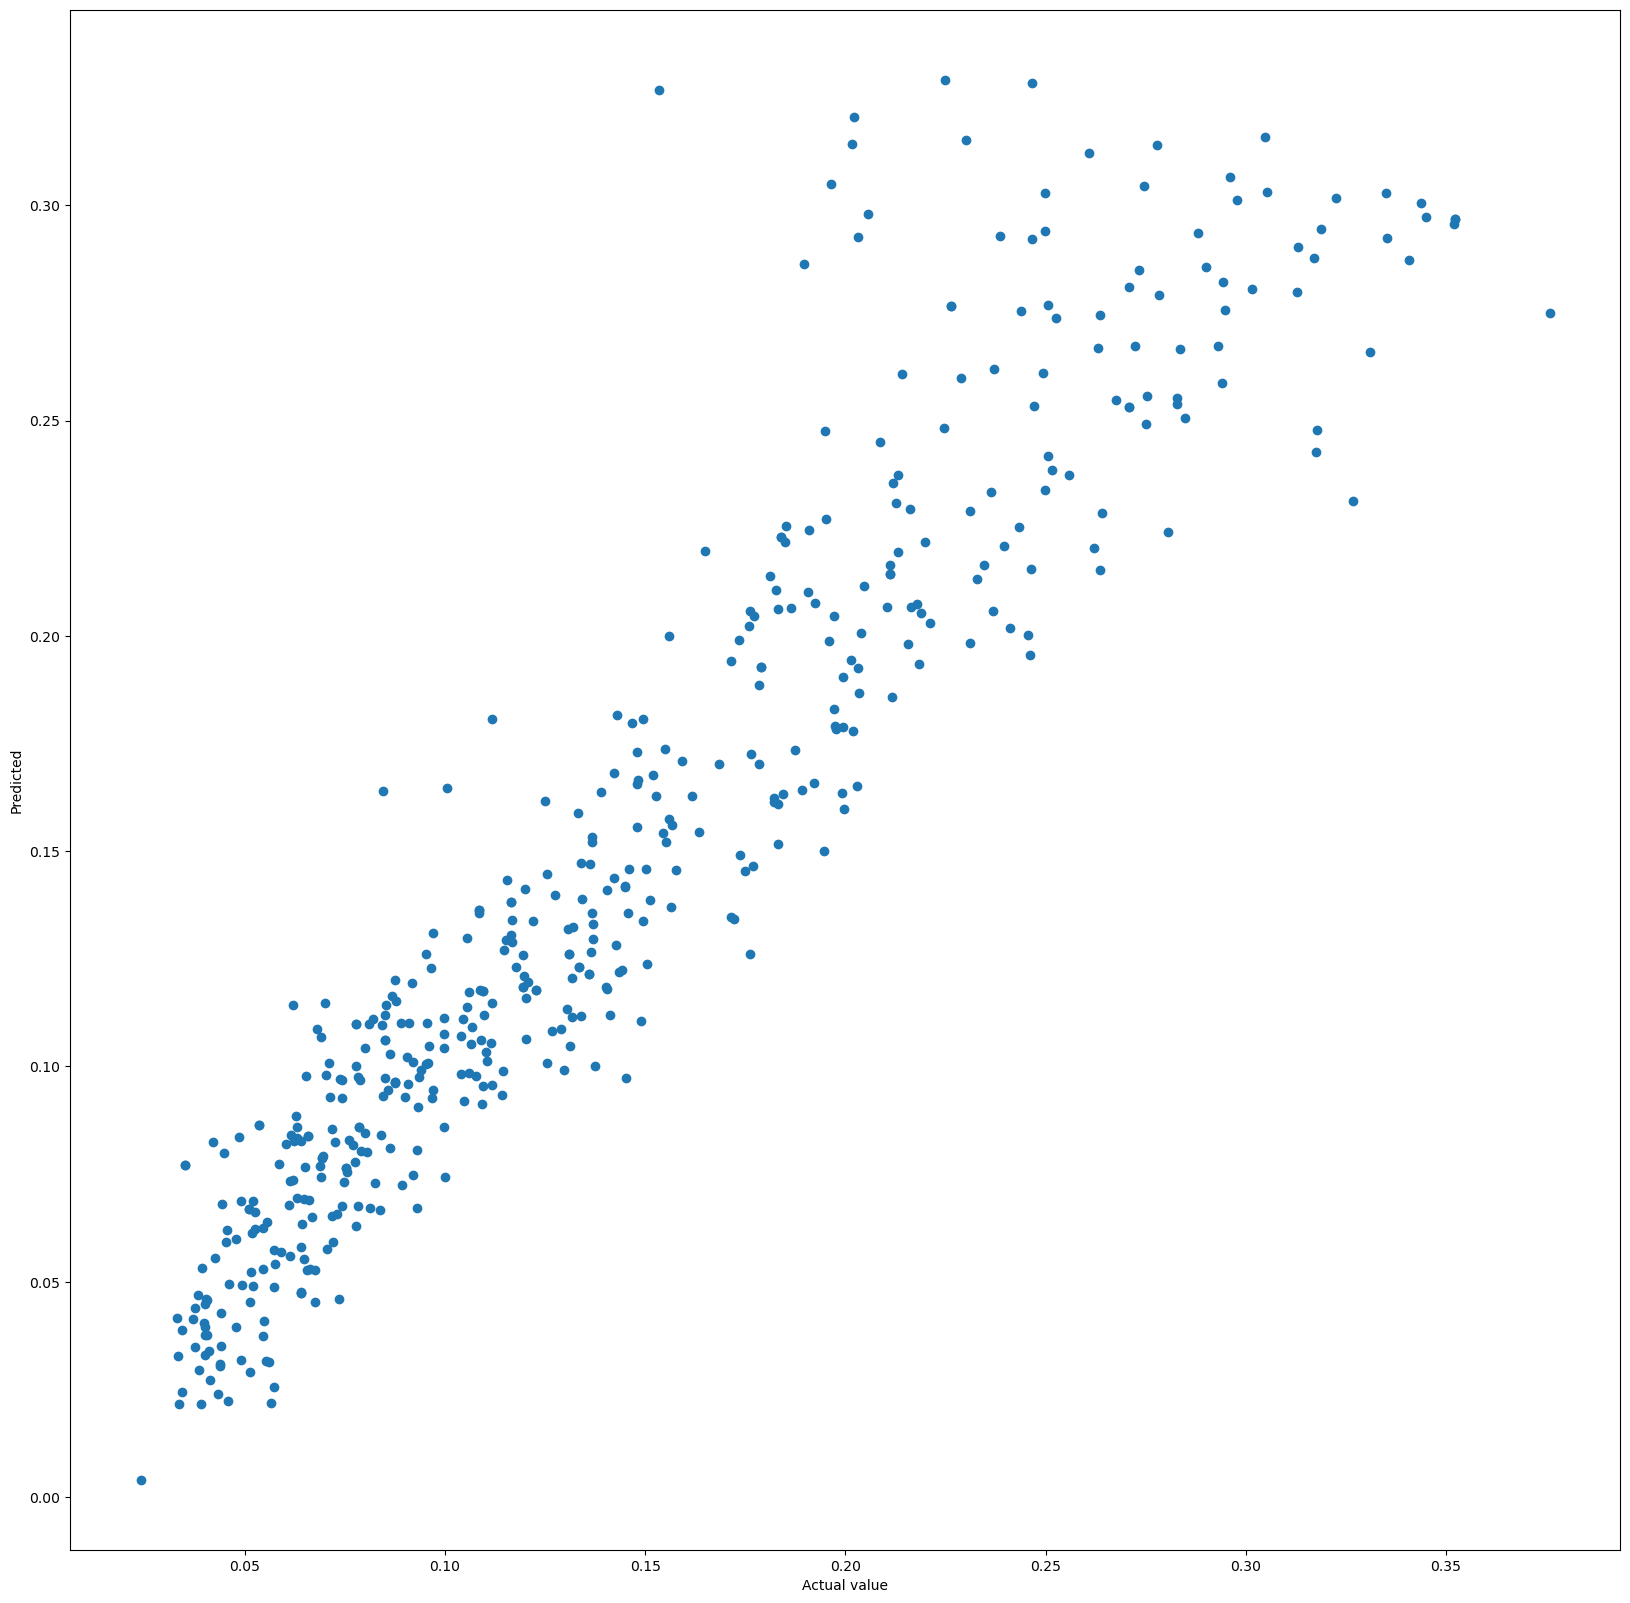

In [26]:
plt.figure(figsize=(20, 20))
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual value")
plt.ylabel("Predicted")

In [27]:
# evaluation
from sklearn.model_selection import GridSearchCV

In [28]:
#Eval on hyper-parameters of LinearRegression
gridSearch = GridSearchCV(LinearRegression(),{
    'fit_intercept': [False,True],
    'n_jobs': [0,1,10,50],
}, cv=10, return_train_score=False)
gridSearch.fit(x,y)
gridSearch.cv_results_

{'mean_fit_time': array([0.0003999 , 0.00070016, 0.00040007, 0.00060017, 0.00070019,
        0.        , 0.00030015, 0.00040011]),
 'std_fit_time': array([0.00048977, 0.00045836, 0.00048998, 0.00049004, 0.00045838,
        0.        , 0.00045848, 0.00049004]),
 'mean_score_time': array([3.00192833e-04, 9.99450684e-05, 4.00090218e-04, 1.00064278e-04,
        9.98973846e-05, 9.00101662e-04, 3.00049782e-04, 2.00033188e-04]),
 'std_score_time': array([0.00045855, 0.00029984, 0.00049001, 0.00030019, 0.00029969,
        0.00030003, 0.00045833, 0.00040007]),
 'param_fit_intercept': masked_array(data=[False, False, False, False, True, True, True, True],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[0, 1, 10, 50, 0, 1, 10, 50],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_inter

In [29]:
dfgs = pd.DataFrame(gridSearch.cv_results_)
dfgs[['param_fit_intercept','param_n_jobs', 'mean_test_score']]

param_fit_intercept param_n_jobs  mean_test_score
0               False            0         0.927611
1               False            1         0.927611
2               False           10         0.927611
3               False           50         0.927611
4                True            0         0.927922
5                True            1         0.927922
6                True           10         0.927922
7                True           50         0.927922

In [42]:
#Eval on hyper-parameters of MLPRegressor
gridSearch = GridSearchCV( MLPRegressor(),{
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd','adam']
}, cv=5, return_train_score=False)
gridSearch.fit(x,y)
gridSearch.cv_results_

{'mean_fit_time': array([0.01520314, 0.04641042, 0.0368083 , 0.02380538, 0.04961109,
        0.06981568, 0.0420095 , 0.07666154, 0.05301213, 0.03480797,
        0.0524508 , 0.05521202]),
 'std_fit_time': array([0.00411855, 0.02084294, 0.00381622, 0.0045351 , 0.00412924,
        0.00757566, 0.01025888, 0.03402207, 0.0112623 , 0.00727872,
        0.00694596, 0.0109827 ]),
 'mean_score_time': array([0.00060024, 0.00040007, 0.00040016, 0.00020003, 0.00060019,
        0.00060019, 0.00060015, 0.00020008, 0.0006001 , 0.0006001 ,
        0.00040026, 0.00060043]),
 'std_score_time': array([0.0004901 , 0.00048998, 0.0004901 , 0.00040007, 0.00049006,
        0.00049006, 0.00049002, 0.00040016, 0.00048998, 0.00048998,
        0.00049021, 0.00049025]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', 'logistic',
                    'logistic', 'logistic', 'tanh', 'tanh', 'tanh', 'relu',
                    'relu', 'relu'],
              mask=[False, False, False, False, F

In [43]:
dfgs = pd.DataFrame(gridSearch.cv_results_)
dfgs[['param_activation','param_solver', 'mean_test_score']]

param_activation param_solver  mean_test_score
0          identity        lbfgs         0.907410
1          identity          sgd         0.243181
2          identity         adam         0.882834
3          logistic        lbfgs         0.899203
4          logistic          sgd        -0.104247
5          logistic         adam         0.516899
6              tanh        lbfgs         0.906325
7              tanh          sgd         0.022086
8              tanh         adam         0.904419
9              relu        lbfgs         0.913922
10             relu          sgd        -0.058368
11             relu         adam         0.891500

In [48]:
gridSearch = GridSearchCV( MLPRegressor(),{
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'max_fun':[15000,20000,10000,25000]
}, cv=5, return_train_score=False)
gridSearch.fit(x,y)
gridSearch.cv_results_

{'mean_fit_time': array([0.02820578, 0.0548121 , 0.03600783, 0.03920884]),
 'std_fit_time': array([0.00945524, 0.01212543, 0.02003467, 0.01135838]),
 'mean_score_time': array([0.00080061, 0.00020013, 0.00020022, 0.00080009]),
 'std_score_time': array([0.0004003 , 0.00040026, 0.00040045, 0.00040004]),
 'param_activation': masked_array(data=['relu', 'relu', 'relu', 'relu'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_fun': masked_array(data=[15000, 20000, 10000, 25000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'lbfgs', 'lbfgs', 'lbfgs'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'relu', 'max_fun': 15000, 'solver': 'lbfgs'},
  {'activation': 'relu', 'max_fun': 20000, 'solver': 'lbfgs'},
  {'activation': 'relu', 'max_fun': 10000, 'sol

In [49]:
dfgs = pd.DataFrame(gridSearch.cv_results_)
dfgs[['param_max_fun', 'mean_test_score']]

param_max_fun  mean_test_score
0         15000         0.913215
1         20000         0.918034
2         10000         0.913931
3         25000         0.911290

# CLASSIFICATION

In [31]:
# import classifcation data set
df=pd.read_csv('adult.csv', index_col=False)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Sum                  0
dtype: int64

In [32]:
# clean data

dfclean = df.dropna() # Drops rows with empty values
dfclean.isnull().sum()
dfclean.loc[dfclean['Age'] > 80].shape[0]
#dfclean[dfclean.Age >80].sum
#sns.boxplot(dfclean['Age'])

#data_mean = df.iloc[:, :]
#data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
#sharey=False, fontsize=12, figsize=(15,20))

75

In [33]:
dfclean.duplicated().sum()

23

In [34]:
dfdropd = dfclean.drop_duplicates()
dfdropd.duplicated().sum()

0

In [35]:
labelencoder = LabelEncoder()
dfcopy = dfdropd.copy()
#df1 = labelencoder.fit_transform(dfdropd['Sex'])
dfcopy['Race'] = labelencoder.fit_transform(dfcopy['Race'])
dfcopy['Sex'] = labelencoder.fit_transform(dfcopy['Sex'])
dfcopy['Occupation'] = labelencoder.fit_transform(dfcopy['Occupation'])
dfcopy['Relationship'] = labelencoder.fit_transform(dfcopy['Relationship'])
dfcopy['Marital-Status'] = labelencoder.fit_transform(dfcopy['Marital-Status'])
dfcopy['Education'] = labelencoder.fit_transform(dfcopy['Education'])
dfcopy['Workclass'] = labelencoder.fit_transform(dfcopy['Workclass'])
dfcopy['Native-country'] = labelencoder.fit_transform(dfcopy['Native-country'])
dfcopy['Sum'] = labelencoder.fit_transform(dfcopy['Sum'])
dfcopy

#dfcopy

Age  Workclass  Fnlwgt  Education  Education-num  Marital-Status  \
0       39          5   77516          9             13               4   
1       50          4   83311          9             13               2   
2       38          2  215646         11              9               0   
3       53          2  234721          1              7               2   
4       28          2  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          7             12               2   
32557   40          2  154374         11              9               2   
32558   58          2  151910         11              9               6   
32559   22          2  201490         11              9               4   
32560   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  \
0               0             1     4    1          2174             0   
1               3             0     4    1             0             0   
2               5             1     4    1             0             0   
3               5             0     2    1             0             0   
4               9             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          12             5     4    0             0             0   
32557           6             0     4    1             0             0   
32558           0             4     4    0             0             0   
32559           0             3     4    1             0             0   
32560           3             5     4    0         15024             0   

       Hours-per-week  Native-country  Sum  
0                  40              38    0  
1                  13              38    0  
2                  40              38    0  
3                  40              38    0  
4                  40               4    0  
...               ...             ...  ...  
32556              38              38    0  
32557              40              38    1  
32558              40              38    0  
32559              20              38    0  
32560              40              38    1  

[30139 rows x 15 columns]

In [36]:
X = dfcopy[['Fnlwgt']]
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
scaler = StandardScaler()
dfcopy['Fnlwgt'] = scaler.fit_transform(X)
data = dfcopy
dfcopy

NameError: name 'StandardScaler' is not defined

In [ ]:
# logistic regression

In [ ]:
# support vector machines

In [ ]:
# split into X and y
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']
# split X and y into training and test sets, test set 30% of data 
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85,
random_state=1, stratify=y)

In [ ]:
# First try SVM with all features selected 
svclassifier = SVC(C=1.0,degree=3, gamma='auto', probability=True)
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
classifier_score = svclassifier.score(X_test, y_test)
print(f"Classifier Score is {classifier_score}")

In [ ]:
# Try dropping features
# Drop Capital-gain and capital-loss due to low variability 
# Drop Education due to Education-num encoding similar data 
# Drop Native-country for low variability (mostly U.S)
# Drop Race for having lowest Chi-Squared statistic 

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
df_reduced.head()

In [ ]:
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.85,
random_state=1, stratify=y1)

In [ ]:
svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X1_train, y1_train)

In [ ]:
y1_pred = svclassifier.predict(X1_test)

In [ ]:
print(classification_report(y1_test, y1_pred))

In [ ]:
## precision for 0 (<=50k) has increased however the precision for 1 (50k >) has decreased
classifier_score1 = svclassifier.score(X1_test, y1_test)
print(f"Classifier Score is {classifier_score1}")

In [ ]:
# model with just 3 best features selected (k=3)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=3)),
 ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

In [ ]:
# decision trees and multi-layer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sum',axis=1), data['Sum'], test_size=.3,random_state=23)
clf = DecisionTreeClassifier(random_state=1)
dtt = clf.fit(X_train, y_train)
predictions = dtt.predict(X_test)
print(accuracy_score(y_test, predictions))



In [ ]:
# perceptron neural network.

In [ ]:
#Analysis

In [ ]:
# create df of the numerical values and Sum to create multiple boxplots

df_numerical = dfdropd[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sum']].copy()

df_numerical.head()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

for i, col in enumerate(df_numerical.columns[0:6]):
    _= sns.boxplot(y=col, x='Sum', data=df_numerical, ax=axes[i])

In [ ]:
# from the boxplots it looks like fnlwgt is similar for both classes, so we may potentially drop that feature.
# also, captital-gain and capital-loss are mostly zero for both classes, so we could drop these as well due to low variability

#Now try to plot the categorical features 
#look at value counts first 

categorical_cols = ['Workclass', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

for col in categorical_cols:
    vals = dfdropd[[col]].value_counts()
    print(vals)
    
# data is skewed towards private sector, white race, males, and United States

In [ ]:
# will use histograms for all categorical features bar countries 
first_dim = 'Sum' 
second_dim = 'Sex'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# males tend to earn more than 50k however the data is skewed towards males 

In [ ]:
first_dim = 'Sum' 
second_dim = 'Race'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# again, data is heavily skewed towards White so hard to tell

In [ ]:
first_dim = 'Sum' 
second_dim = 'Relationship'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# can see husbands are more likely to earn over 50k, not-in-family and own child less likely - important feature

In [ ]:
first_dim = 'Sum' 
second_dim = 'Marital-Status'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# Married-civ-spouse most liekly to earn over 50k, never-married and divorsed less likely, rest of data is smaller 
# in comparison 

In [ ]:
first_dim = 'Sum' 
second_dim = 'Workclass'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
#data skewed towards private secotr so hard to make judgement, similar results for both classes

In [ ]:
first_dim = 'Sum' 
second_dim = 'Occupation'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )

# exec- managerial and prof-speciality both most likely to earn over 50k, data well spread out - important feature. 

In [ ]:
# evaluation